<h1 align="center">Explorar el concepto de Pluralismo utilizando la Ciencia de los Datos: un estudio de caso con el ecosistema mediático de Chile</h3>

<div align="center"><i>Autores: Profesores y Estudiantes del Magíster en Informática (Universidad Austral de Chile)</i></div>
<div align="center"><i>I semestre 2018</i></div>
</br>
<div align="center"><i>Gabriela Gonzalez - Boris Sotomayor</i></div>

<h2>1. Objetivo de investigación general</h2>
<ul>
<li><p>El <b>Pluralismo</b> de los medios es un principio que garantiza que l@s ciudadan@s disponen de una información pólitica e ideólogica diversificada, permitiendoles ejercer su <i>espiritu crítico</i> y su <i>libertad de pensar</i>. Por lo tanto, la Organización de las Naciones Unidas para la Educación, la Ciencia y la Cultura (UNESCO) definió el pluralismo de los medios como una condición necesaria para construir la Democracía.</p></li>
<li><b>Medir para entender</b>: <i>“When you can measure what you are speaking about, and express it in numbers, you know something about it; but when you cannot measure it, when you cannot express it in numbers, your knowledge is of a meagre and unsatisfactory kind; it may be the beginning of knowledge, but you have scarcely, in your thoughts, advanced to the stage of science, whatever the matter may be.”</i> - Lord Kelvin (1883)
<li><b>Pregunta general:</b> ¿La Informática, más particularmente la Ciencia de los Datos, puede medir el Pluralismo de los medios? ¿Se puede establecer un protocolo computacional para medir y entender varias facetas del Pluralismo de los Medios basandose sobre técnicas de Clustering de datos?</li>
</ul>

### 1.2. Pregunta de Investigación
- ¿Las Noticias referentes al feminismo se presentan desde una postura única por la prensa chilena? 

- En particular ¿Un medio en específico presenta una única postura frente a la temática del feminismo? 

### 1.3. Hipótesis
- Los medios eligen una misma postura al momento de hablar de feminismo. 
- En particular, un medio elegirá siempre la misma postura al hablar de feminismo. 

## 2. Materiales y métodos
### 2.1 Dataset
 
Utilizamos datos de medios de prensa obtenidos mediante la plataforma Sophia dentro del período de febrero y mayo del año 2018. 

El dataset inicial cuenta con las siguientes características:

+ Fecha de publicación de la noticia
+ Medio de prensa
+ Título de la noticia
+ Texto o cuerpo de la noticia

Con el fin de obtener un set de tópicos por medio del análisis de texto o cuerpo de la noticia, realizamos una serie de operaciones sobre los datos, de modo de eliminar palabras que no aportan información a los análisis. Además, dentro del estudio incluimos aquellos medios de prensa que registran una cantidad igual o superior a 10 noticias en el período de tiempo en que se tomaron las muestras. Finalmente, utilizamos el algoritmo denominado Latent Dirichlet Allocation (LDA) para la extracción de tópicos de los documentos, con el fin de comprender si el algoritmo es capaz de registrar más de un tópico al momento de hablar de un tema: Feminismo.

En este tipos de problema, resulta fundamental pre-procesar los datos con los cuales se realizará la investigación, debido a que un set de las palabras de un texto aportarán información de lo que estemos estudiando, mientras el restante set no. A continuación se presentan en detalle cada etapa del pre-procesamiento de datos.


### 2.2 Herramientas Software Utilizadas

En este trabajo utilizamos Python3 con Notebook Jupyter, en conjunto con librerías de amplio uso en problemas de Data Science, tales como: Matplotlib, Numpy, Pandas, Seaborn. Además, para el análisis de texto utilizamos Sklearn, spaCy y nltk.

### 2.3 Filtro de tokens

Un token corresponde a una palabra encontrada en un texto. Es la componente de texto mínima en nuestro estudio y la cuál nos permite analizar las posturas y/o tópicos en los documentos.

En nuestro trabajo, utilizamos la librería **spaCy** para encontrar aquellos tokens que corresponden a adjetivos, sustantivos y verbos (lema). De esta forma, descartamos cualquier otro tipo de token presente en el analisis.

### 2.4 Filtro manual

Pese a que existen poderosas herramientas para automatizar el análisis de texto, muchas de las palabras involucradas requieren de una revisión manual para descartar aquellas que corresponden a otros factores y que incorporan ruido en los datos. Ejemplos de este tipo de palabras son "https", "radio", "compartir" que el algoritmo de detección de lemas utilizado no filtra. Estas y otras palabras fueron incorporadas en una lista de "palabras a descartar" al momento de realizar el análisis. En el estudio desarrollado se vuelve necesaria la intervención e interpretación humana de los resultados que se obtienen mediante estos métodos.

In [3]:
#importar librerias
from matplotlib.pylab import hist, show
import matplotlib.pyplot as plt

import matplotlib
import numpy as np
import pandas as pd
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()

In [4]:
def tokenize_lemmatize_filtering(text):
    filtered_lemmas = []
    #personas = []
    doc = nlp(text)
    for token in doc :
        print(token, ":",token.pos_)
        if re.search('[a-zA-Z]', token.lemma_.lower()):
            if (token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'VERB' ):
                filtered_lemmas.append(token.lemma_.lower())
    return filtered_lemmas



In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import adjusted_rand_score


[nltk_data] Downloading package stopwords to /home/boris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/boris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
#Utilizando Kmeans y tf-idf para realizar un primer agrupamiento de los mensajes
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#el primero es la métrica compleja y el segundo solo toma el número de aparición. 
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


In [10]:
#Cargar el dataset de tweets
df_feminismo = pd.read_csv('../actividad3/datasets/sophia_feminismo_v2.csv',delimiter="|", header=None)
df_feminismo

#selección de los mensajes
docs = df_feminismo[3].as_matrix()
docs_titles = df_feminismo[2].as_matrix()
#DEBUG print(len(docs))
#DEBUG print(len(docs_titles))

### 2.4 Selección de medios de prensa

Debido a que los medios de prensa no contienen una cantidad uniforme de noticias relacionadas con el feminismo en el período de estudio, se decidió seleccionar aquellos medios que contengan una cantidad igual o superior a 10 noticias. Esto se debe a que, en muchos otros medios de prensa, la cantidad de noticia son considerablemente bajas, lo cual dificulta el análisis.


In [15]:
list(df_feminismo[1])
list_medios = [x.lower().replace(" ", "").replace("_", "") for x in list(df_feminismo[1].unique() )]
list_medios

lista_mano = ['adn', 'dínamo', 'clinic','24horas','mostrador','publimetro','online','zero','radiar','noticiar', 'redar', 'twitter']
for i in lista_mano:
    list_medios.append(i)

print("Lista de medios:")
list_medios

Lista de medios:


['mega',
 'rvfradiopopular',
 'latercera',
 'mapuexpress',
 'soychilecl',
 'digitalfmchile',
 'eldesconcierto',
 'thecliniccl',
 'emol',
 'elamaule',
 'publimetrochile',
 'elquintopoder',
 'elciudadano',
 'mqltv',
 'revistacosas',
 'cooperativa',
 'inforioscl',
 'elmostrador',
 'elepicentro',
 'elvicunense',
 'copano',
 'biobio',
 'pinguinodiario',
 'tele13radio',
 'laredtv',
 'redmivoz',
 'uchileradio',
 'nacioncl',
 'elserenense',
 'eldiacl',
 'rsumen',
 'diarioelandino',
 'eldinamo',
 'ahoranoticiasan',
 'cambio21cl',
 'andreaaristegui',
 'radiozero977',
 'elsiglochile',
 'cnnchile',
 'corrupcionchile',
 'educacion2020',
 'adnradiochile',
 'ucvradio',
 'rtierrabella',
 'lacuarta',
 'forochile',
 'rnuevomundo',
 '24horastvn',
 'radioduna',
 'osornonoticias',
 'msncl',
 'elperiscopiocl',
 'emolmagazine',
 'eldeportivolt',
 'gambacl',
 'chvnoticiascl',
 'laprensaustral',
 'elmartutino',
 'revistacapital',
 'elclarindechile',
 't13',
 'diariolahora',
 'diarioafta',
 'glamoramacl',
 'gre

In [12]:
df_feminismo[1].value_counts()


 latercera           126
 eldesconcierto      104
 MQLTV                61
 PublimetroChile      59
 thecliniccl          44
 elmostrador          42
 el_dinamo            38
 rvfradiopopular      29
 El_Ciudadano         28
 corrupcionchile      25
 CNNChile             21
 DiarioLaHora         18
 ElDeportivoLT        18
 elquintopoder        17
 msncl                16
 radiozero977         16
 adnradiochile        15
 Cooperativa          15
 24HorasTVN           15
 Medio_a_Medio        14
 Pagina7Chile         11
 elepicentro          10
 uchileradio          10
 JGMRadio              9
 soychilecl            9
 lacuarta              8
 Tele13_Radio          8
 copano                8
 LaTerceraTV           7
 DigitalFmChile        7
                    ... 
 radiousach            1
 rtierrabella          1
 diariolaguino         1
 ucv_tv                1
 DiarioPaillaco        1
 TerraChile            1
 diariolabatalla       1
 pdteibanez            1
 Publimetro_TV         1


*Down-sampling*

Posterior a esta selección de medios, se utilizó un down-sampling de los datos con el fin de obtener analizar la misma cantidad de noticias para cada medio. El down-sampling consiste, particularmente, en obtener una cantidad limitada de noticias de aquel medio con menor cantidad de ellas. En nuestro caso, seleccionamos 10 noticias para cada medio y, para aquellos medios que contienen más noticias que esta cantidad, se seleccionaron 10 noticias de de forma aleatoria. De esta forma, cada medio estudiado posee una cantidad uniforme y equitativa de posts o noticias.


In [16]:
# down-sampling 
# tomamos n_noticias noticias random de todos los medios que tienen más de n_noticias noticias.
n_noticias = 10
docs_filtered = df_feminismo.drop_duplicates(subset = [1,2])

docs_filtered = docs_filtered.groupby(1).filter(lambda x: len(x) > n_noticias)
#print(docs_filtered)
distinct_medios = docs_filtered[1].unique()
docs_final = []
for i in distinct_medios:
    #print(i)
    medio_i = docs_filtered[docs_filtered[1] == i]
    rand_i = np.random.choice(len(medio_i), n_noticias, replace=False)
    #rand_i = np.random.randint(, size=n_noticias)
    #print(rand_i)
    for j in rand_i:
        #print(medio_i.iloc[j])
        docs_final.append(medio_i.iloc[j][2])
len(np.unique(np.array(docs_final)))

190

In [11]:
medio_i

,0,1,2,3
260,2017-07-24 10:28:47,Medio_a_Medio,Programa Radial: “Kontrababylon” Wallmapu + K...,"Comunicados, cuñitas, audios, Entrevist..."
375,2018-05-31 23:04:20,Medio_a_Medio,Querella contra Carabineros por acción ilegal...,Un nuevo tirón de orejas le propinó la ...
381,2018-05-31 22:53:04,Medio_a_Medio,"Medio a Medio en Twitter: ""En este capítulo e...",Detectamos que JavaScript está desactivado en...
426,2017-07-18 12:37:03,Medio_a_Medio,Campaña Radial “Fuera Forestales: Destruyen e...,Campaña Radial “Fuera Forestales” produ...
491,2017-11-15 18:21:03,Medio_a_Medio,"Alerta Educativa #224 : “Afrofeminismo, una M...",Las luchas contra el sistema patriarcal...
646,2017-07-12 12:25:25,Medio_a_Medio,Programa Radial: “Aire Puro” #492 Huerto Case...,Comenzamos el programa compartiendo la ...
647,2017-07-17 13:23:07,Medio_a_Medio,Programa Radial: “Kontrababylon” Información ...,"Comunicados, audios de información inde..."
773,2018-03-07 15:07:22,Medio_a_Medio,¿Es que acaso debemos ser todas feministas? R...,Foto: Rafael Edwards (https://www.flick...
856,2017-07-13 09:50:47,Medio_a_Medio,Hecho en Conce N° 9 con Alvaro Muñoz (podcast...,"Con Alvaro Muñoz, periodista, autor La..."
857,2017-07-13 20:36:04,Medio_a_Medio,"Al sur del Río Bravo: Situación en Venezuela,...",En el programa N°78 viajamos a Venezuel...


In [17]:
#df_feminismo[1].hist()

#plt.figure(figsize=(20,50))

#plt.hist(df_feminismo[1].as_matrix(), bins = 100)
#plt.savefig('histogramMedios.pdf')
#plt.show()

In [18]:
def testing_tokenFilter():
    text = docs_titles[0]
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    array_return = [val for val in filtered_tokens if len(val)>3]
    return array_return

In [20]:
# NLTK
stemmer = SnowballStemmer("spanish")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('spanish')

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_tokens = [val for val in filtered_tokens if len(val)>3]

    return filtered_tokens

### 2.5 Método para extracción de tópicos

El algoritmo Latent Dirichlet Allocation (LDA) es utilizado para encontrar estructuras ocultas en los datos. En nuestro trabajo, este método es utilizado para encontrar tópicos en el set de documentos analizados. Cada tópico está compuesto por un set de palabras que lo componen, además de un valor de *ranking* que permite identificar la importancia de dicha palabra en el tópico. 
Este método nos permitirá encontrar el conjunto de tópicos que se abarcan en el total de eventos noticiosos analizados. Para encontrar distintas posturas se analizará la diferencia entre los distintos tópicos identificados por el algoritmo LDA. 

En esta etapa también utilizamos la clase CountVectorizer y su función fit_transform para construir una matriz tf (DTM, Document-Term Matrix) con la frecuencia de aparición de cada término o palabra del vocabulario en cada texto. Además, seleccionamos los siguientes criterios para encontrar los tópicos:
+ Los términos que aparecen menos de 7 veces en algún texto no serán considerados en el vocabulario (min_df=7)
+ Los términos que aparecen en mas del 50% de los textos no serán considerados en el vocabulario (max_df=0.50)
+ Se utilizará un conjunto de stop words del español manualmente seleccionadas
+ Los términos a estudiar corresponderán a verbos, sustantivos y adjetivos

In [14]:
def tokenize_lemmatize_filtering(text):
    filtered_lemmas = []
    #personas = []
    doc = nlp(text)
    #print(doc.ents)
    for token in doc :
        if (re.search('[a-zA-Z]', token.lemma_.lower())) and (not '@' in token.lemma_.lower()) and (not '/' in token.lemma_.lower()) and (not '.' in token.lemma_.lower())  :
            if (not token.lemma_.lower() in list_medios):
                #print(token, ":",token.pos_)
                if (token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'VERB' ):
                    filtered_lemmas.append(token.lemma_.lower())
    return filtered_lemmas



Finalmente, utilizamos la medida de Perplexity, para la evaluación de $k \in {1..20}$ tópicos, como una representación de qué tan precisa es nuestra definición de éstos. Valores de perplexity bajos en la siguiente iteración ($k_{i+1}$) para un determinado valor $k_i$, implica seleccionar el valor $k_i$.
En este trabajo, seleccionamos el valor de $k=7$ tópicos para el análisis global de medios de prensa. 

## 3. Resultados

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


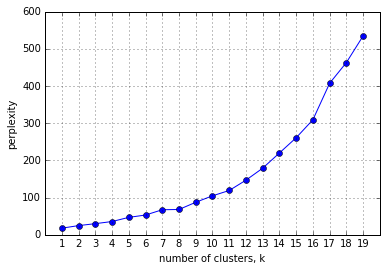

In [22]:
num_k = range(1, 20)
inertias = []

tf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=7,
                                stop_words='english',tokenizer=tokenize_lemmatize_filtering, ngram_range=(1,1))
#tf = tf_vectorizer.fit_transform(docs)
#tf = tf_vectorizer.fit_transform(docs_titles)
tf = tf_vectorizer.fit_transform(docs_final)


diccionario= tf_vectorizer.get_feature_names() # tener a la vista las palabras que están en todos los textos. 



for k in num_k:
    print(k)
    # Create a KMeans instance with k clusters: model
    lda = LatentDirichletAllocation(n_components=k, max_iter=10,
                                learning_method='online',
                                learning_offset=50., 
                                random_state=0)
    lda.fit(tf)

    # Fit model to samples
    #model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(lda.perplexity(tf))



# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('perplexity')
plt.xticks(num_k)
plt.grid()
plt.show()

#list_token = ['NOUN', 'VERB', 'ADJ', 'SCONJ', '']

In [24]:
def tokenize_lemmatize_filtering(text):
    filtered_lemmas = []
    #personas = []
    doc = nlp(text)
    #print(doc.ents)
    for token in doc :
        if (re.search('[a-zA-Z]', token.lemma_.lower())) and (not '@' in token.lemma_.lower()) and (not '/' in token.lemma_.lower()) and (not '.' in token.lemma_.lower())  :
            if (not token.lemma_.lower() in list_medios):
                #print(token, ":",token.pos_)
                if (token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'VERB' ):
                    filtered_lemmas.append(token.lemma_.lower())
    return filtered_lemmas


In [26]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ;".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

tf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=7,
                                stop_words='english',tokenizer=tokenize_lemmatize_filtering, ngram_range=(1,1))
tf = tf_vectorizer.fit_transform(docs_final)


diccionario= tf_vectorizer.get_feature_names()


#Estimación de LDA con Bayes Variacional
k_topics = 7
lda = LatentDirichletAllocation(n_components=k_topics, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)
#Cálculo de índice de ajuste de los datos
print(lda.perplexity(tf))
print("\nTopics in LDA model:")
print_top_words(lda, diccionario, 30)

67.34444717151877

Topics in LDA model:
Topic #0: paginar ;desconcertar ;feminismo ;responder ;radical ;mujer ;chile ;tener ;chávez ;feminista ;agenciar ;daniella ;hora ;machismo ;foto ;criticar ;crónico ;polémico ;sociedad ;mediar
Topic #1: sociedad ;tener ;feminismo ;mujer ;feminista ;chávez ;daniella ;chile ;machismo ;agenciar ;responder ;hora ;foto ;radical ;crónico ;mediar ;paginar ;criticar ;desconcertar ;polémico
Topic #2: mujer ;feminista ;agenciar ;mediar ;hora ;polémico ;tener ;chile ;machismo ;feminismo ;paginar ;daniella ;desconcertar ;responder ;chávez ;sociedad ;criticar ;foto ;crónico ;radical
Topic #3: agenciar ;machismo ;mediar ;chile ;tener ;radical ;criticar ;mujer ;foto ;crónico ;desconcertar ;daniella ;feminista ;polémico ;hora ;sociedad ;feminismo ;chávez ;paginar ;responder
Topic #4: chile ;foto ;criticar ;responder ;polémico ;feminista ;hora ;crónico ;feminismo ;paginar ;machismo ;chávez ;daniella ;desconcertar ;tener ;sociedad ;agenciar ;mediar ;radical ;mujer


[ 0.08340757  0.08335098  0.0833698   0.08358955  0.08337968  0.58290241]
[ 0.15784972  0.18074976  0.12983836  0.13299745  0.19565551  0.2029092 ]
[0 1 2 3 4 5]


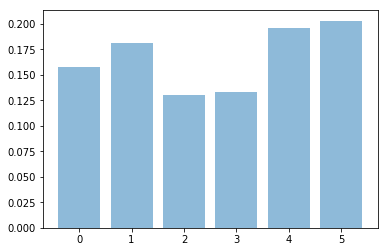

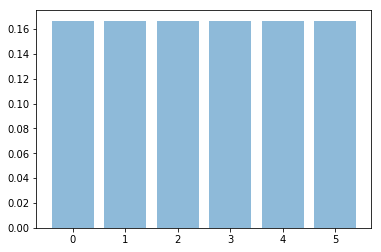

0


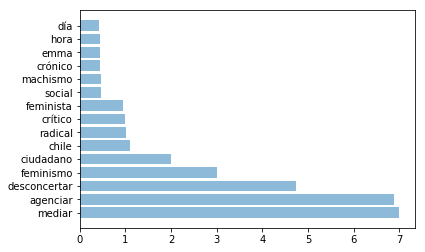

1


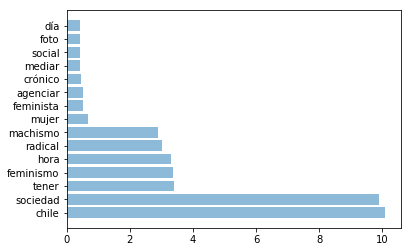

2


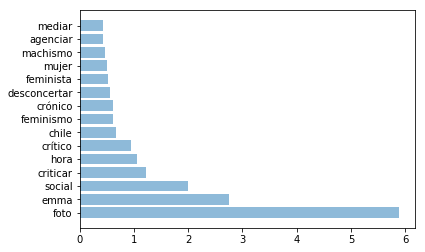

3


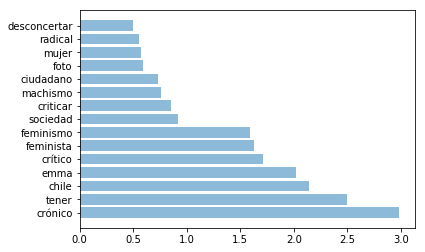

4


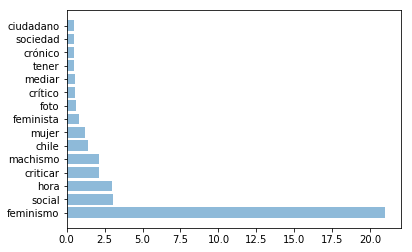

5


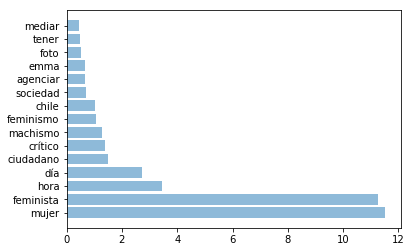

In [18]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

y=lda.fit_transform(tf)
print(y[0])
#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs_final)
#print(dist.max())
print(dist)
#print(k_topics)
w=np.arange(0,k_topics)
print(w)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 30
plt.bar(w,height=y[30],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico (para las 10 primeras)
n_top_words=15
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    print(idx)
    d = []
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()


## Analisis de Resultados

<div> <li>Luego que correr el algoritmo múltiples veces, encontramos que los tópicos identificados poseen términos comunes, habiendo algunos que se centran en personas que han opinado del feminismo o han tomado alguna acción relacionada.</li></div>
<div> <li>Los tópicos identificados utilizan terminología sensacionalista al hablar de feminismo, usando los términos:</li>
    <ul>
    <li> radical </li>
    <li> polemica </li>
    <li> critica </li> 
   </ul>
</div>
<div> <li>también se considera destacable que se organicen las palabras *feminismo, mujer y machismo* dentro de un mismo tópico, situación que a su vez, se repite en distintos tópicos (en todos los tópicos del ejemplo expuesto)  </li>

</div> 
</br></br>

<div><b> Por lo anterior se concluye que no es posible percibir distintas posturas dentro de los medios de prensa chilenos con la metodología utilizada, puesto que todos los tópicos diferenciados poseen conceptos similares</b></div> 



Topics in LDA model: (Resultado del Análisis )
- **Topic #0**: paginar ;desconcertar ;feminismo ;responder ;radical ;mujer ;chile ;tener ;chávez ;feminista ;agenciar ;daniella ;hora ;machismo ;foto ;criticar ;crónico ;polémico ;sociedad ;mediar
- **Topic #1**: sociedad ;tener ;feminismo ;mujer ;feminista ;chávez ;daniella ;chile ;machismo ;agenciar ;responder ;hora ;foto ;radical ;crónico ;mediar ;paginar ;criticar ;desconcertar ;polémico
- ** Topic #2**: mujer ;feminista ;agenciar ;mediar ;hora ;polémico ;tener ;chile ;machismo ;feminismo ;paginar ;daniella ;desconcertar ;responder ;chávez ;sociedad ;criticar ;foto ;crónico ;radical
- ** Topic #3**: agenciar ;machismo ;mediar ;chile ;tener ;radical ;criticar ;mujer ;foto ;crónico ;desconcertar ;daniella ;feminista ;polémico ;hora ;sociedad ;feminismo ;chávez ;paginar ;responder
- **Topic #4**: chile ;foto ;criticar ;responder ;polémico ;feminista ;hora ;crónico ;feminismo ;paginar ;machismo ;chávez ;daniella ;desconcertar ;tener ;sociedad ;agenciar ;mediar ;radical ;mujer
- ** Topic #5**: feminismo ;hora ;machismo ;radical ;daniella ;polémico ;chávez ;paginar ;tener ;chile ;sociedad ;mediar ;responder ;mujer ;agenciar ;feminista ;desconcertar ;foto ;crónico ;criticar
- ** Topic #6**: crónico ;chile ;feminismo ;agenciar ;mediar ;feminista ;mujer ;daniella ;chávez ;radical ;polémico ;responder ;desconcertar ;foto ;sociedad ;tener ;criticar ;machismo ;paginar ;hora

# Analisis de Posturas por Medio  



## Preprocesamiento

In [20]:

#Cargar el dataset de tweets
df_feminismo


,0,1,2,3
0,2017-06-01 11:02:34,Mega,"ALBERTO PLAZA: ""NO SOY FACHO"" MundoH.cl",El cantante conversó con Mundo H de su activa...
1,2017-03-02 23:18:36,rvfradiopopular,"A propósito de Andrea Balbontín, la anti femi...","28 Octubre 2016 Este jueves en la noche, al ..."
2,2017-03-03 09:57:11,latercera,Jane Fonda confiesa que fue violada a los 12 ...,La famosa actriz hollywoodense Jane Fonda hiz...
3,2017-02-26 10:49:03,Mapuexpress,Video: Lectura de la poeta Mapuche Daniela Ca...,Lectura de la poeta Mapuche Daniela Catrileo ...
4,2017-03-06 14:50:02,soychilecl,"soychile.cl en Twitter: ""Emma Watson posó sin...",Noticias de todo nuestro país. Cuando twittea...
5,2017-03-07 07:30:01,DigitalFmChile,"Digital Fm Chile en Twitter: ""Emma Watson pos...",Cuenta oficial de Radio Digital FM. Al aire e...
6,2017-03-07 07:56:57,eldesconcierto,Sin feminismo no hay Frente Amplio,El feminismo no es una política “para mujeres...
7,2017-03-07 16:15:53,thecliniccl,Malaimagen: Utilidad - The Clinic Online,"The Clinic Online 07 Marzo, 2017 Tags: femini..."
8,2017-03-04 20:15:01,Mega,EMMA WATSON Y LA GRAN POLÉMICA POR POSAR EN T...,La actriz ha sido blanco de críticas luego de...
9,2017-03-06 09:24:59,Emol,"Emol.com en Twitter: ""Emma Watson responde a ...",El sitio de noticias de Chile y el mundo. ¡Es...


array([' Mega ', ' rvfradiopopular ', ' latercera ', ' Mapuexpress ',
       ' soychilecl ', ' DigitalFmChile ', ' eldesconcierto ',
       ' thecliniccl ', ' Emol ', ' el_amaule ', ' PublimetroChile ',
       ' elquintopoder ', ' El_Ciudadano ', ' MQLTV ', ' RevistaCosas ',
       ' Cooperativa ', ' InforiosCL ', ' elmostrador ', ' elepicentro ',
       ' elvicunense ', ' copano ', ' biobio ', ' pinguinodiario ',
       ' Tele13_Radio ', ' LaRedTV ', ' RedMiVoz ', ' uchileradio ',
       ' nacioncl ', ' el_serenense ', ' eldia_cl ', ' rsumen ',
       ' diario_elandino ', ' el_dinamo ', ' ahoranoticiasAN ',
       ' cambio21cl ', ' AndreaAristegui ', ' radiozero977 ',
       ' elsiglochile ', ' CNNChile ', ' corrupcionchile ',
       ' Educacion2020 ', ' adnradiochile ', ' ucvradio ',
       ' rtierrabella ', ' lacuarta ', ' ForoChile ', ' RNuevoMundo ',
       ' 24HorasTVN ', ' RadioDuna ', ' osornonoticias ', ' msncl ',
       ' ElPeriscopioCL ', ' emol_magazine ', ' ElDeportivoLT '

In [49]:
dict_MedioContenido = {}
dict_MedioTitulo = {}

n_noticias = 15 
df_porMedio = df_feminismo.groupby(1).filter(lambda x: len(x) > n_noticias)
medios = df_porMedio[1].unique()
print(len(medios))
for medio in medios:
    df_medio = df_porMedio[df_porMedio[1] == medio][3].as_matrix()
    dict_MedioContenido[medio] = df_medio
    df_medio = df_porMedio[df_porMedio[1] == medio][2].as_matrix()
    dict_MedioTitulo[medio] = df_medio
dict_MedioContenido

16


{' CNNChile ': array([ ' 10 de Agosto, 2017 - 14:32 Hrs. El estremecedor relato de machismo que... La respuesta de Emma Watson a quienes... Lali Espósito: "Estoy muy feliz... Parodiaron el reto de Isabel Pantoja a... Los artistas más esperados por los... Los artistas más esperados por los... Presentador de TV llevó el mismo traje... Virginia Vargas profundizó en los... Polémicos fueron los dichos de la cantante argentina Lali Espósito sobre el feminismo.\xa0 En entrevista con la revista Gente negó ser feminista y lo comparó con el machismo:\xa0"No\xa0soy feminista, porque sería tan grave como ser machista". "Detesto los extremos, las terminologías, la lucha de opiniones por tener razón. Mi aporte es el contagio de actitud, la inspiración desde mi don, \'el hacer\'", agregó.\xa0 Sin embargo, reconoció que\xa0"la mujer avanza. Las latinas lo hacen tanto como el machismo de los ritmos urbanos les permiten. Pero más allá de eso,\xa0es un buen momento para el\xa0girl\xa0power". Aun así, los

In [44]:
def tokenize_lemmatize_filtering(text):
    filtered_lemmas = []
    #personas = []
    doc = nlp(text)
    #print(doc.ents)
    for token in doc :
        if (re.search('[a-zA-Z]', token.lemma_.lower())) and (not '@' in token.lemma_.lower()) and (not '/' in token.lemma_.lower()) and (not '.' in token.lemma_.lower())  :
            if (not token.lemma_.lower() in list_medios):
                #print(token, ":",token.pos_)
                if (token.pos_ == 'NOUN' or token.pos_ == 'ADJ' ): #or token.pos_ == 'VERB' ):
                    filtered_lemmas.append(token.lemma_.lower())
    #for w in doc.ents: 
    #    print('Named Entities:', w, "-->", w.label)
        #filtered_lemmas.append(w.)
        #personas.append(w)
    return filtered_lemmas

 rvfradiopopular 
2 3 4 5 6 7 8 9 

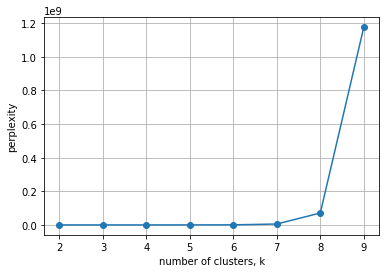

 latercera 
2 3 4 5 6 7 8 9 

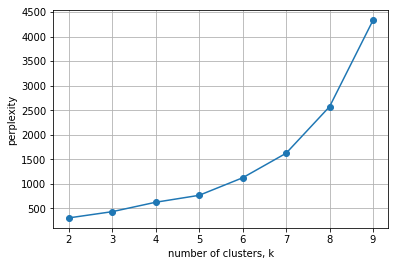

 eldesconcierto 
2 3 4 5 6 7 8 9 

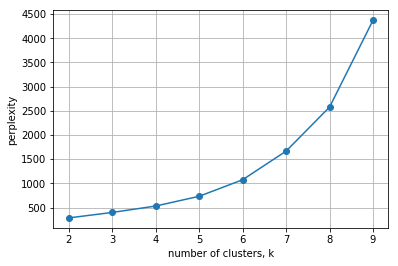

 thecliniccl 
2 3 4 5 6 7 8 9 

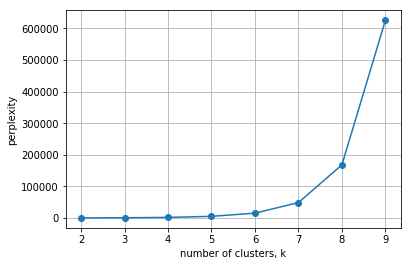

 PublimetroChile 
2 3 4 5 6 7 8 9 

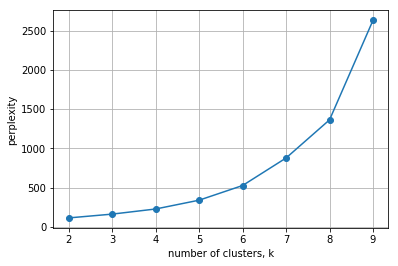

 elquintopoder 
2 3 4 5 6 7 8 9 

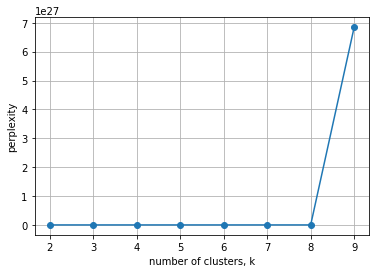

 El_Ciudadano 
2 3 4 5 6 7 8 9 

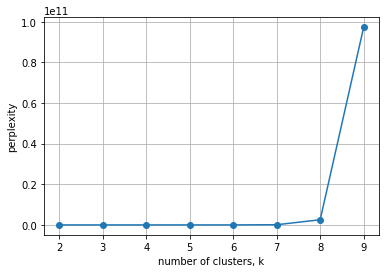

 MQLTV 
2 3 4 5 6 7 8 9 

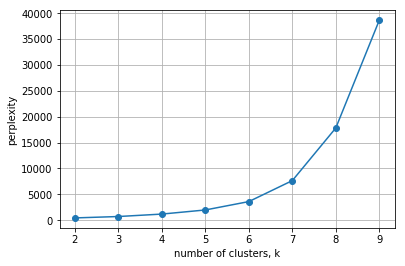

 elmostrador 
2 3 4 5 6 7 8 9 

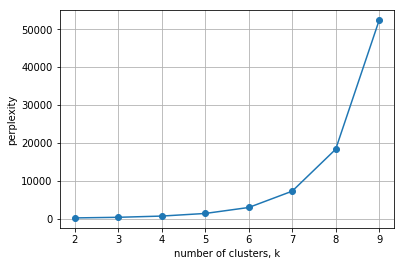

 el_dinamo 
2 3 4 5 6 7 8 9 

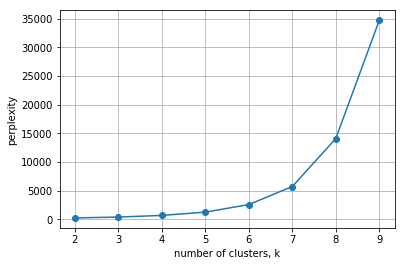

 radiozero977 
2 3 4 5 6 7 8 9 

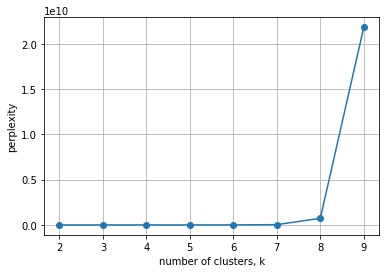

 CNNChile 
2 3 4 5 6 7 8 9 

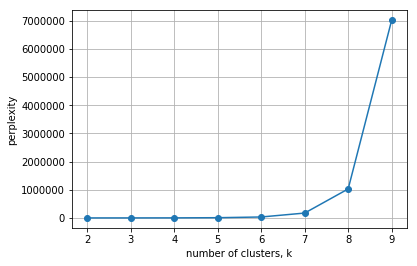

 corrupcionchile 
2 3 4 5 6 7 8 9 

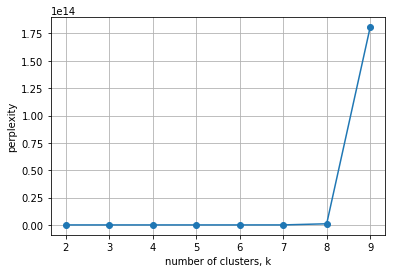

 msncl 
2 3 4 5 6 7 8 9 

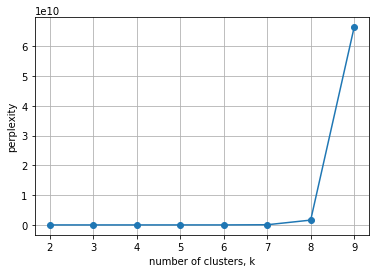

 ElDeportivoLT 
2 3 4 5 6 7 8 9 

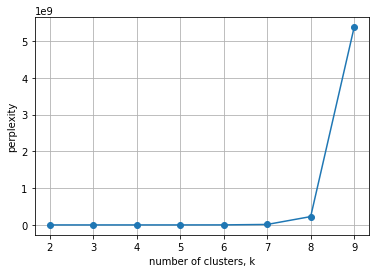

 DiarioLaHora 
2 3 4 5 6 7 8 9 

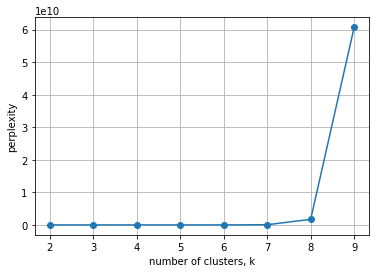

In [50]:

num_k = range(2, 10)
#Se probó con hasta 18 y la curva es exponencial. 


tf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.1,
                                stop_words='english',tokenizer=tokenize_lemmatize_filtering, ngram_range=(1,1))


for medio in medios:
    inertias = []
    print(medio)
    docs_final = dict_MedioContenido[medio]
    
    tf = tf_vectorizer.fit_transform(docs_final)

    diccionario= tf_vectorizer.get_feature_names() # tener a la vista las palabras que están en todos los textos. 

    for k in num_k:
        print(k, end=" ")
        # Create a KMeans instance with k clusters: model
        lda = LatentDirichletAllocation(n_components=k, max_iter=10,
                                    learning_method='online',
                                    learning_offset=50., 
                                    random_state=0)
        lda.fit(tf)

        # Fit model to samples
        #model.fit(X)

        # Append the inertia to the list of inertias
        inertias.append(lda.perplexity(tf))



    # Plot ks vs inertias
    plt.plot(num_k, inertias, '-o')
    plt.xlabel('number of clusters, k')
    plt.ylabel('perplexity')
    plt.xticks(num_k)
    plt.grid()
    plt.show()


Como el perplexity no nos entrega infomación se probará con topics igual 2, 3 y 4 

 rvfradiopopular 
1072.93798297

Topics in LDA model:
Topic #0: abril ;septiembre ;mujer ;octubre ;marzo ;agostar ;enfrentar ;compañero ;político ;casar ;fantasma ;derecho ;trabajar ;mayar ;violencia ;expresión ;santiago ;luchar ;martes ;jueves ;interior ;sábado ;trabajador ;formar ;fiesta ;histórico ;marchar ;chile ;social ;cortar
Topic #1: octubre ;tweet ;información ;ubicación ;web ;temer ;presidente ;carta ;código ;actualización ;personar ;pulsar ;popular ;sitiar ;video ;nuevo ;conversación ;magni ;momento ;francia ;andrea ;servidor ;sol ;comandante ;instantáneo ;antipatriarcado ;problema ;tamara ;abrir ;hacer



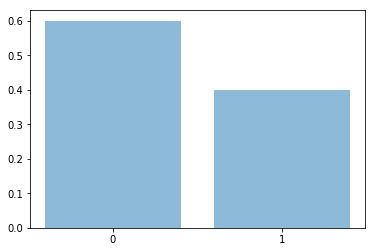

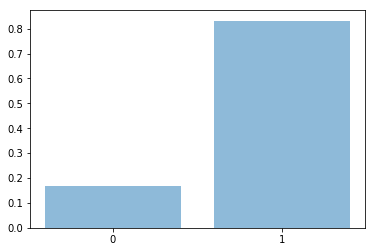

0


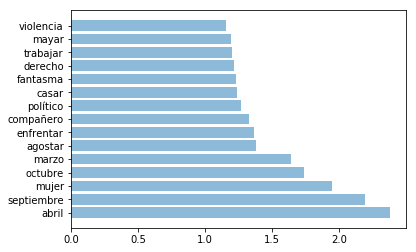

1


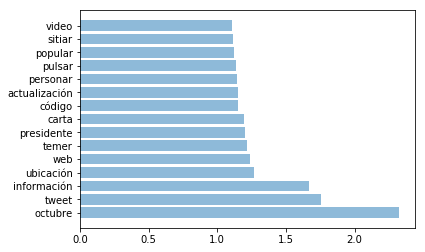

 latercera 
306.093051877

Topics in LDA model:
Topic #0: información ;tweet ;hora ;ubicación ;web ;minuto ;conversación ;sitiar ;actualización ;pulsar ;instantáneo ;código ;problema ;personar ;momento ;colo ;siguiente ;año ;estar ;santiago ;aplicación ;momentáneo ;tweets ;reciente ;desarrollador ;historial ;respuesta ;tiempo ;cuenta ;manera
Topic #1: mujer ;minuto ;feminista ;hombre ;año ;librar ;vez ;vida ;género ;social ;día ;partir ;chileno ;historia ;ideo ;igualdad ;político ;hora ;coser ;derecho ;primero ;segundar ;diario ;mundo ;sexual ;movimiento ;editorial ;sociedad ;último ;formar



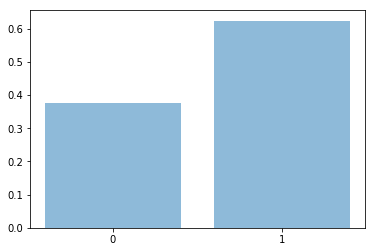

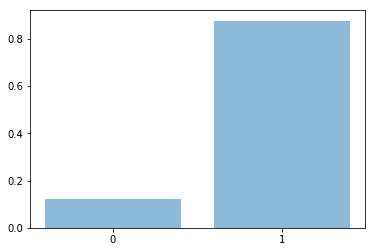

0


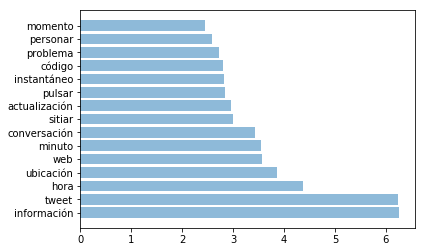

1


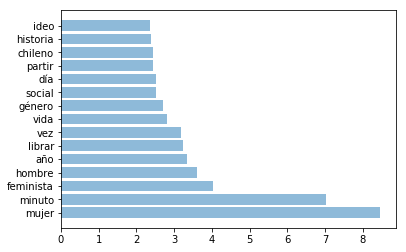

 eldesconcierto 
284.995946809

Topics in LDA model:
Topic #0: información ;tweet ;web ;ubicación ;sitiar ;código ;pulsar ;actualización ;instantáneo ;desarrollador ;aplicación ;conversación ;problema ;siguiente ;tweets ;icono ;seguidor ;respuesta ;reciente ;cultural ;corazón ;mmm ;rápido ;amor ;botón ;infórmate ;servidor ;compartirlo ;momentáneo ;reportaje
Topic #1: hombre ;luchar ;partir ;violencia ;chile ;género ;año ;movimiento ;festival ;social ;día ;vida ;cuerpo ;músico ;trabajar ;importante ;igualdad ;desconcertar ;formar ;mundo ;poblar ;público ;colectivo ;contexto ;coser ;último ;escritor ;machista ;frente ;casar



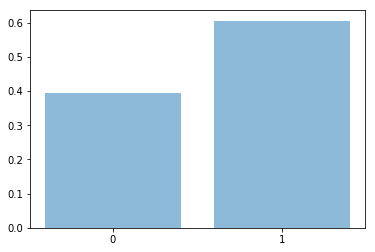

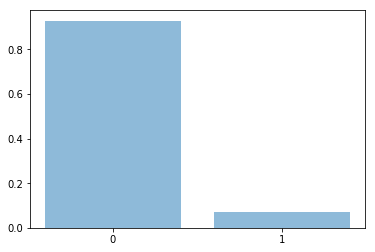

0


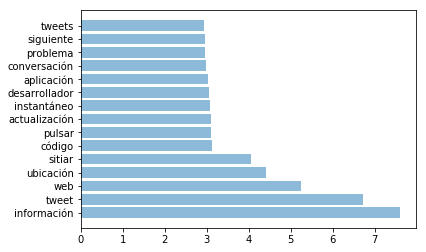

1


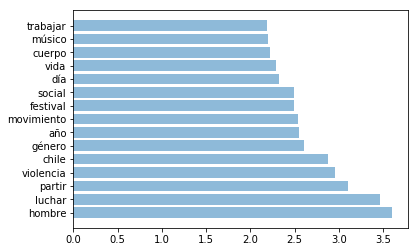

 thecliniccl 
538.938798005

Topics in LDA model:
Topic #0: derecho ;trabajar ;partir ;alberto ;político ;madre ;marzo ;movimiento ;casar ;nuevo ;violencia ;cuerpo ;día ;género ;temer ;sociedad ;sexual ;vez ;machismo ;carta ;mundo ;año ;igualdad ;cultural ;gracia ;muerte ;femenino ;luchar ;verdadero ;hijo
Topic #1: cultura ;machismo ;periodista ;sexo ;video ;palabra ;igualdad ;acordar ;estar ;artista ;propósito ;machista ;personar ;contener ;marzo ;nuevo ;polémico ;historia ;temer ;pescar ;conversación ;respectar ;instante ;típico ;político ;comentario ;diccionario ;chile ;término ;hacer



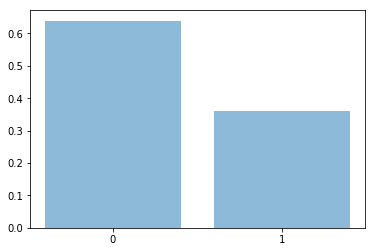

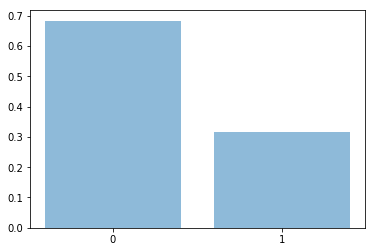

0


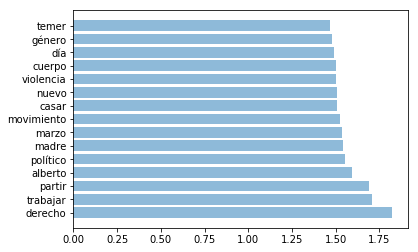

1


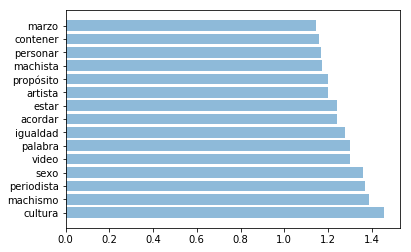

 PublimetroChile 
112.778461272

Topics in LDA model:
Topic #0: arjona ;machismo ;claritos ;canal ;fondo ;programar ;agresión ;reaccionar ;síguenos ;polémico ;versión ;cuerpo ;hombre ;vez ;suegro ;edición ;activista ;gracia ;claro ;gran ;reservar ;metro ;facebook ;ideo ;básico ;vida ;respectar ;crítico ;actriz ;rutina
Topic #1: año ;feminista ;gracia ;actriz ;netflix ;natalia ;reaccionar ;rutina ;cecilia ;suegro ;partir ;valdebenito ;derecho ;foto ;casar ;metro ;versión ;sexual ;coser ;internacional ;hombre ;international ;móvil ;reservar ;edición ;cuerpo ;respectar ;síguenos ;ideo ;especial



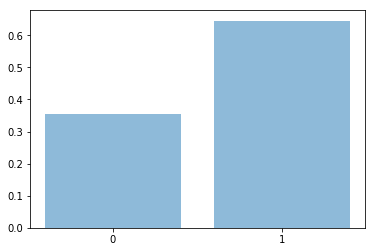

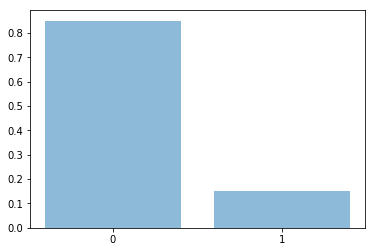

0


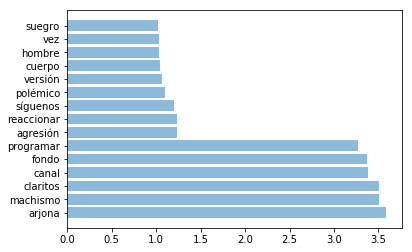

1


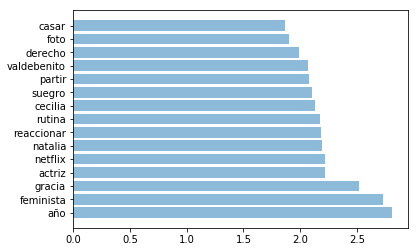

 elquintopoder 
10468.3102953

Topics in LDA model:
Topic #0: tweet ;web ;ubicación ;sitiar ;instantáneo ;aplicación ;conversación ;desarrollador ;código ;libre ;actualización ;tolerancia ;momentáneo ;botón ;posicionar ;solidificar ;ciudad ;perfil ;reciente ;través ;cuenta ;tener ;icono ;inténtalo ;celular ;clic ;igualdad ;rodolfo ;url ;schmal
Topic #1: feminazi ;igualdad ;sociedad ;término ;mundo ;terminar ;feminazis ;violencia ;septiembre ;casar ;coser ;diferenciar ;nazi ;partir ;octubre ;niño ;concepto ;verdad ;opinión ;importante ;año ;general ;hijo ;hembrismo ;artículo ;antojo ;parecer ;gente ;favor ;bien



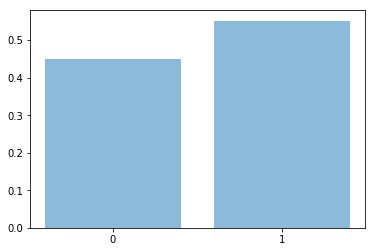

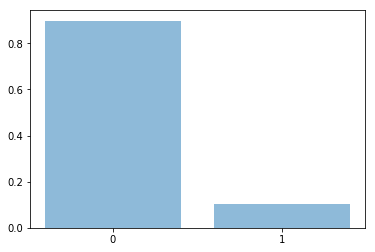

0


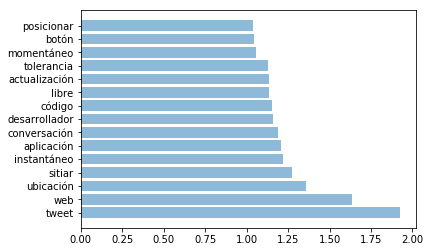

1


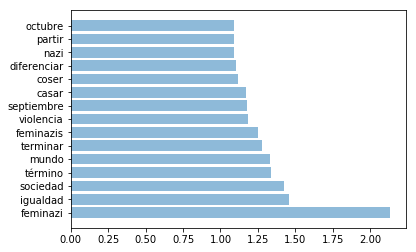

 El_Ciudadano 
1876.66424278

Topics in LDA model:
Topic #0: violencia ;negro ;chileno ;festival ;feminista ;luchar ;cambiar ;género ;país ;respectar ;machismo ;relación ;recoleto ;demandar ;sentir ;organizar ;partir ;foto ;temático ;red ;ámbito ;ley ;encontrar ;organización ;temer ;público ;jornada ;solo ;colectivo ;contener
Topic #1: información ;tweet ;web ;ubicación ;sitiar ;instantáneo ;personar ;video ;pulsar ;siguiente ;feminista ;conversación ;lugar ;actualización ;problema ;temer ;medir ;gran ;código ;sistema ;pasar ;movimiento ;varón ;teoría ;tweets ;económico ;estar ;manera ;género ;relacionar



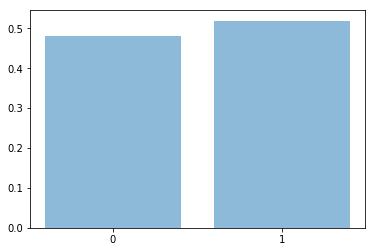

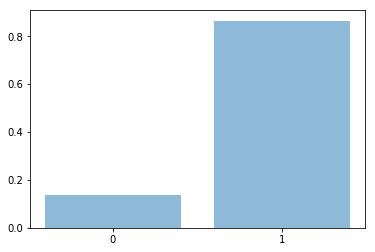

0


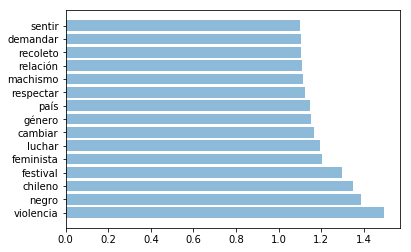

1


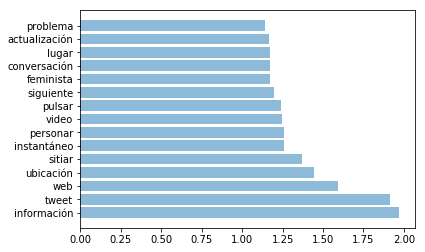

 MQLTV 
445.780419635

Topics in LDA model:
Topic #0: feminista ;crítico ;género ;cine ;sexual ;peor ;educación ;movimiento ;día ;sociedad ;emma ;temer ;vértigo ;social ;machismo ;acevedo ;jumbo ;producto ;netflix ;niño ;precio ;partir ;ciper ;mundo ;lección ;femenino ;reflexión ;carta ;cliente ;hijo
Topic #1: facebook ;dicho ;yuhui ;abuelo ;vestir ;masterchef ;parejo ;internet ;foto ;polémico ;carabinero ;callar ;chileno ;envideo ;cumbia ;católico ;contar ;nieto ;estudiante ;despacito ;ciudadano ;estacionamiento ;gustar ;perreo ;ataúd ;sensación ;emma ;amigar ;lucero ;tarjeta



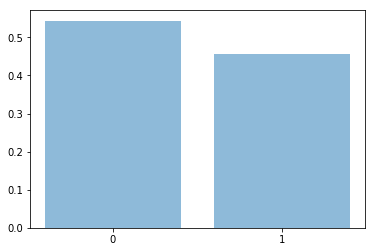

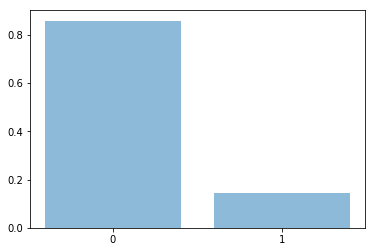

0


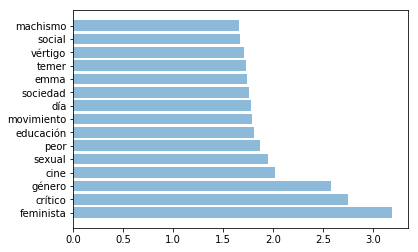

1


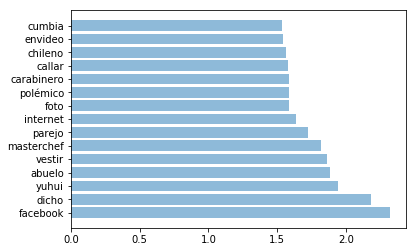

 elmostrador 
237.022740827

Topics in LDA model:
Topic #0: normal ;valor ;usuario ;hombre ;feminista ;lugar ;derecho ;marzo ;movimiento ;patriarcado ;opinión ;diario ;luchar ;día ;igualdad ;actualizar ;país ;verdad ;género ;violencia ;formar ;mundo ;machista ;frente ;social ;reservar ;solo ;vida ;cuerpo ;partir
Topic #1: desarrollador ;tweets ;aplicación ;tener ;exacto ;ciudad ;través ;tercero ;video ;diario ;opinión ;partir ;lugar ;machismo ;versión ;social ;mediar ;espaciar ;feminista ;coser ;cuerpo ;chileno ;género ;machista ;derecho ;verdad ;día ;moda ;decir ;hombre



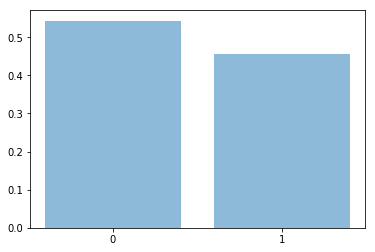

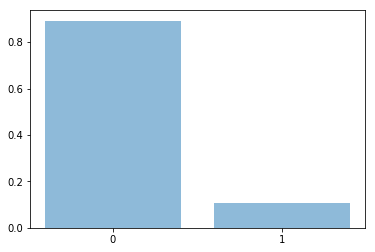

0


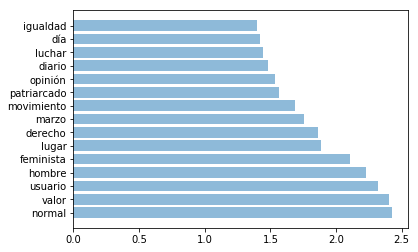

1


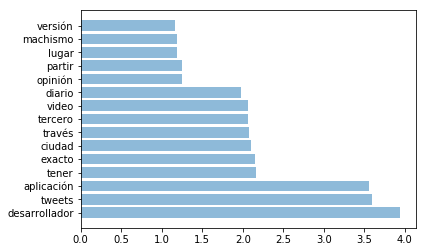

 el_dinamo 
246.274875223

Topics in LDA model:
Topic #0: información ;tweet ;web ;ubicación ;sitiar ;actualización ;siguiente ;conversación ;infórmate ;problema ;aplicación ;instantáneo ;desarrollador ;pulsar ;código ;tweets ;personar ;clic ;manera ;acordar ;inténtalo ;compartirlo ;pasar ;corazón ;imagen ;hacer ;respuesta ;opción ;posicionar ;puntero
Topic #1: hombre ;feminista ;día ;vez ;social ;género ;año ;comentario ;periodista ;último ;respectar ;suscríbete ;programar ;librar ;entrevistar ;igualdad ;coser ;televisión ;machista ;autor ;chileno ;femenino ;gobernar ;seriar ;derecho ;formar ;luchar ;segundar ;decir ;situación



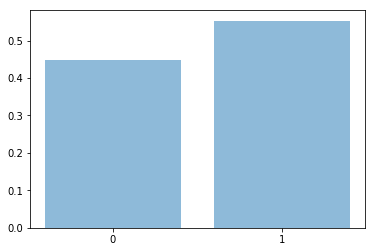

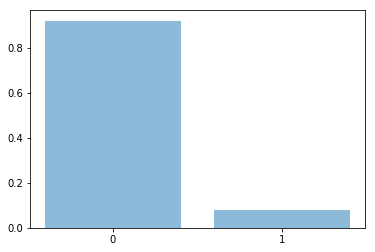

0


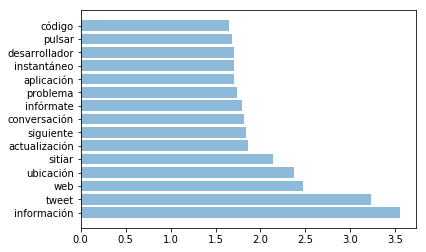

1


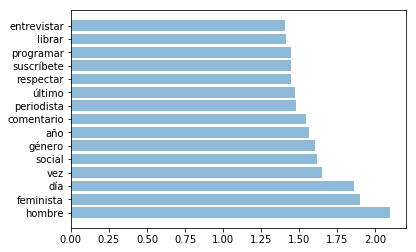

 radiozero977 
962.195272223

Topics in LDA model:
Topic #0: músico ;canción ;partir ;público ;verano ;campar ;artista ;hombre ;foxman ;temer ;salamanca ;power ;heidi ;mundo ;fuente ;set ;través ;escribir ;manir ;selector ;visitar ;reconocer ;disco ;electoral ;contra ;desarrollador ;ann ;affair ;personaje ;fidelidad
Topic #1: tweet ;información ;mujer ;año ;ubicación ;web ;pasar ;sitiar ;foto ;hijo ;temer ;instantáneo ;conversación ;mejorar ;personar ;pulsar ;momento ;presidente ;historia ;responsabilidad ;libre ;amor ;correcto ;actualización ;publicación ;siguiente ;enero ;premio ;costo ;url



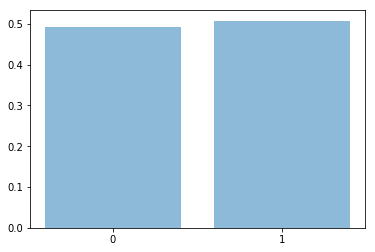

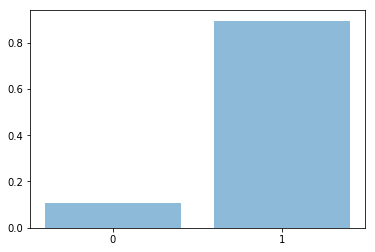

0


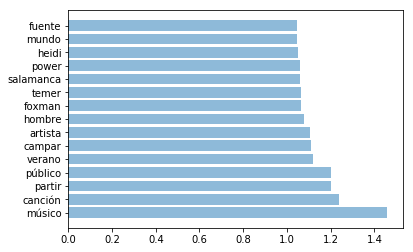

1


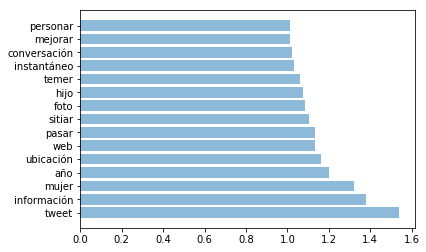

 CNNChile 
404.655157177

Topics in LDA model:
Topic #0: hombre ;estudiante ;amplio ;día ;actriz ;machismo ;frente ;género ;igualdad ;relatar ;video ;nacional ;llamar ;agenda ;ideo ;emma ;ministro ;año ;watson ;educación ;casar ;rol ;sexista ;giorgio ;estremecedor ;varela ;jackson ;luchar ;michelle ;temer
Topic #1: contar ;presidente ;nuevo ;falto ;público ;dueño ;piñera ;video ;partir ;mayar ;primero ;sistema ;educación ;canción ;oposición ;universidad ;ministro ;avanzar ;anuncio ;alto ;año ;bueno ;parir ;viernes ;claudia ;gobernar ;salar ;marco ;propuesta ;polémico



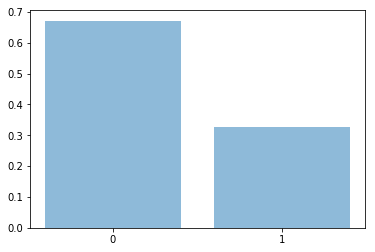

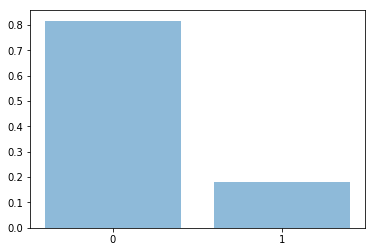

0


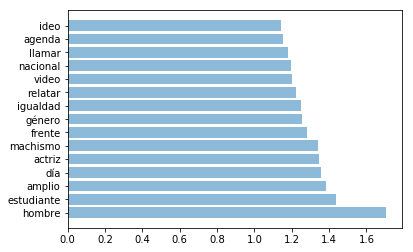

1


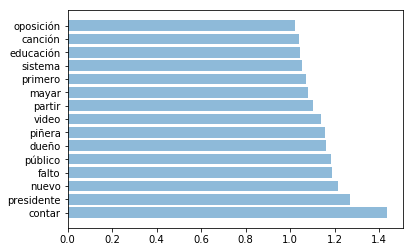

 corrupcionchile 
2436.04955348

Topics in LDA model:
Topic #0: frente ;amplio ;valdebenito ;diputar ;revolución ;natalia ;coser ;político ;complejo ;ex ;educación ;día ;repudiar ;machista ;belleza ;ola ;humano ;cerebro ;palabra ;chileno ;importante ;habilidad ;programar ;máximo ;violencia ;rencor ;razón ;librar ;reef ;doctrinar
Topic #1: certification ;diputar ;político ;escritor ;social ;tweet ;establecer ;violencia ;derecho ;género ;jiles ;ley ;javiera ;patriarcado ;vacarezza ;electo ;polémico ;cerebro ;tweets ;librar ;conversación ;miss ;través ;nuevo ;radical ;questions ;chileno ;natalia ;periodista ;dump



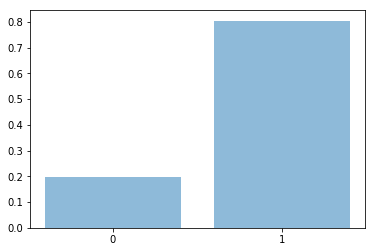

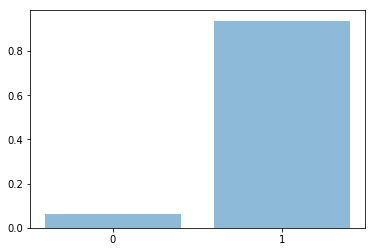

0


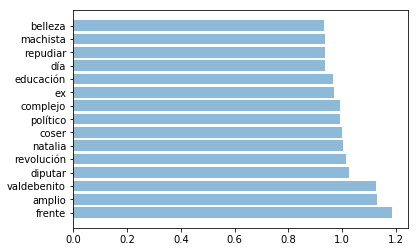

1


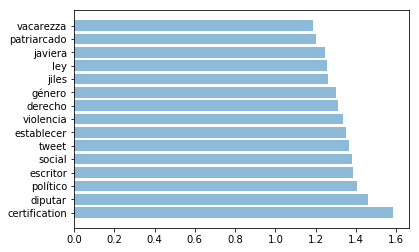

 msncl 
950.156249338

Topics in LDA model:
Topic #0: banda ;grupo ;rosenthal ;abuso ;problema ;denise ;lindar ;foto ;barrera ;integrar ;masculino ;mensaje ;sexual ;destino ;contra ;cuanto ;sociedad ;violencia ;cambiar ;género ;nuevo ;músico ;búsqueda ;seriar ;derecho ;frente ;oportunidad ;contar ;cargar ;social
Topic #1: película ;problema ;feminista ;igualdad ;temer ;niño ;año ;chile ;historia ;hijo ;aplicación ;chico ;cargar ;comentario ;fácil ;importancia ;sociedad ;actriz ;mejorar ;poder ;ola ;error ;campaña ;solo ;machista ;concursar ;día ;género ;bueno ;vestir



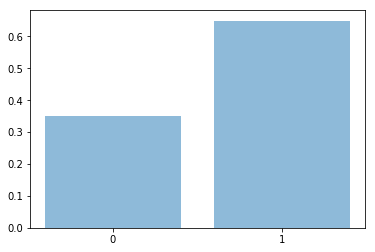

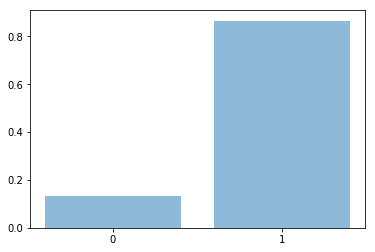

0


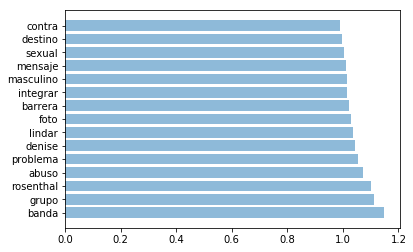

1


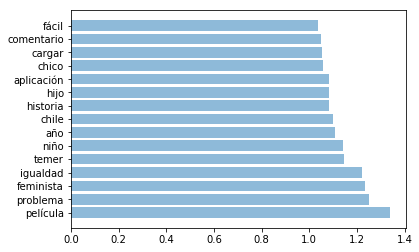

 ElDeportivoLT 
973.852386901

Topics in LDA model:
Topic #0: colo ;sudáfrica ;abortar ;mercar ;ley ;gol ;jugador ;tiempo ;segundar ;nuevo ;mayor ;universidad ;pared ;voz ;cortar ;santiago ;derecho ;práctico ;puc ;gobernar ;trabajar ;galería ;técnico ;arrasador ;día ;iniciar ;juez ;anotación ;cancha ;chileno
Topic #1: ranking ;chileno ;huracán ;bayern ;operación ;voz ;tercero ;año ;lugar ;contratar ;estadio ;mundo ;gran ;retroceso ;accidentar ;atp ;suponer ;público ;matías ;jarry ;mujer ;jugador ;nicolás ;panel ;danés ;médico ;octavo ;ministro ;febrero ;colo



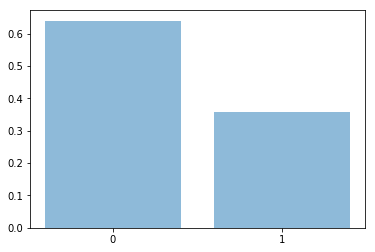

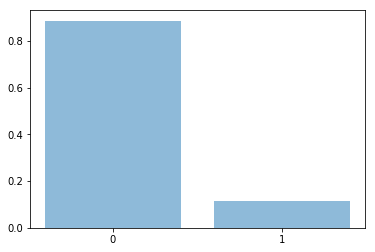

0


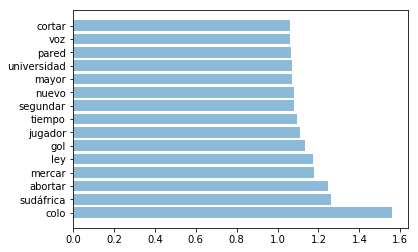

1


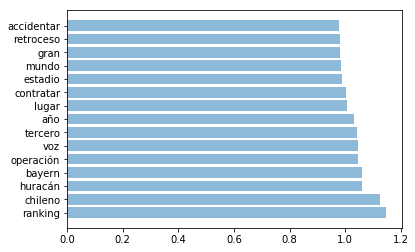

 DiarioLaHora 
1096.061315

Topics in LDA model:
Topic #0: información ;tweet ;web ;ubicación ;instantáneo ;conversación ;código ;actualización ;pulsar ;desarrollador ;siguiente ;aplicación ;exacto ;inténtalo ;rápido ;saturar ;reciente ;amor ;perfil ;cronología ;contar ;tweets ;infórmate ;historia ;url ;radical ;clic ;manera ;icono ;opción
Topic #1: trabajar ;año ;sexual ;bueno ;argentino ;cuidar ;elección ;fin ;laboral ;producto ;jueves ;corto ;hombre ;cebolla ;día ;formar ;ejemplo ;gente ;país ;edad ;parlamentario ;mejor ;mundo ;literatura ;culinario ;gran ;marzo ;feminista ;relleno ;social



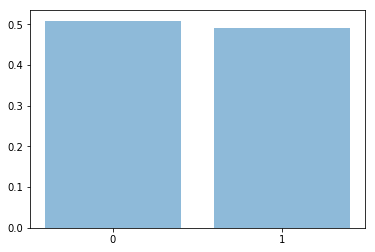

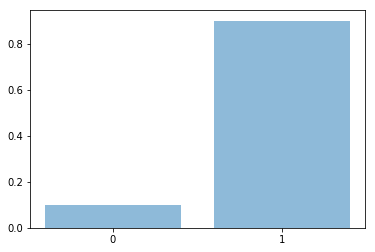

0


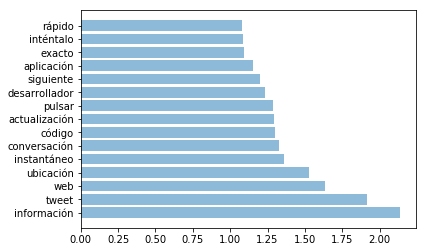

1


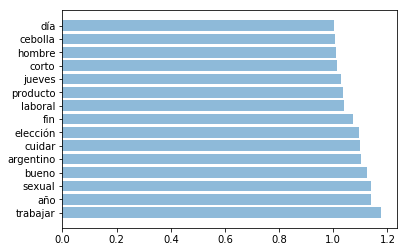

In [51]:
tf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.1,
                                stop_words='english',tokenizer=tokenize_lemmatize_filtering, ngram_range=(1,1))
#tf = tf_vectorizer.fit_transform(docs)
#tf = tf_vectorizer.fit_transform(docs_titles)
for medio in medios:
    print(medio)
    docs_final = dict_MedioContenido[medio]
    tf = tf_vectorizer.fit_transform(docs_final)
    diccionario= tf_vectorizer.get_feature_names()


    #Estimación de LDA con Bayes Variacional
    k_topics = 2
    lda = LatentDirichletAllocation(n_components=k_topics, max_iter=10,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)

    lda.fit(tf)
    #Cálculo de índice de ajuste de los datos
    print(lda.perplexity(tf))
    print("\nTopics in LDA model:")
    print_top_words(lda, diccionario, 30)
    
    y=lda.fit_transform(tf)
    
    #print(y[0])
    #distribución de tópicos en todos los documentos
    dist = sum(y)/len(docs_final)
    
    #print(k_topics)
    w=np.arange(0,k_topics)
    plt.bar(w,height=dist,alpha=0.5,tick_label=w)
    show()
    #distribución de tópicos en el documento 30
    plt.bar(w,height=y[10],alpha=0.5,tick_label=w)
    show()


    #frecuencia de palabras por tópico (para las 10 primeras)
    n_top_words=15
    numo =np.arange(0,n_top_words)
    for idx,topic in enumerate(lda.components_):
        print(idx)
        d = []
        s = []
        for i in topic.argsort()[:-n_top_words - 1:-1]:
              s.append(diccionario[i])
              d.append(topic[i])

        plt.barh(numo,width=d,alpha=0.5,tick_label=s)
        show()

## Resultados Analisis por medios

- En el el caso de cada medio se optó por generar dos tópicos y compararlos. 
- En los tópicos generados se observa un tópico general y otro de términos relacionados a la temática feminista.

**No es posible conlcuir que existen distintas posturas en un medio con esta metodología. **
